## **Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization

from data import Cifar10Loading, DataVisualization,DataPreprocessing


from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow.keras'

In [13]:
!pip --version
!pip install tensorflow-data-validation==1.14.0


pip 24.0 from C:\Users\user\anaconda3\envs\myenv37\lib\site-packages\pip (python 3.8)



In [11]:

pip install tensorflow==2.15


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.15 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1)
ERROR: No matching distribution found for tensorflow==2.15


In [12]:
!pip list


Package                         Version
------------------------------- ---------------
absl-py                         1.4.0
anyio                           4.2.0
apache-beam                     2.56.0
argon2-cffi                     23.1.0
argon2-cffi-bindings            21.2.0
arrow                           1.3.0
asttokens                       2.4.1
astunparse                      1.6.3
async-lru                       2.0.4
async-timeout                   4.0.3
attrs                           23.2.0
Babel                           2.14.0
backcall                        0.2.0
backports.zoneinfo              0.2.1
beautifulsoup4                  4.12.3
bleach                          6.1.0
Brotli                          1.1.0
cached-property                 1.5.2
cachetools                      5.3.2
cattrs                          23.2.3
certifi                         2024.2.2
cffi                            1.16.0
charset-normalizer              3.3.2
cloudpickle                

## **Load Dataset**

In [2]:
data=Cifar10Loading()
data.getShape()
data.class_names

Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

## **Visualization**

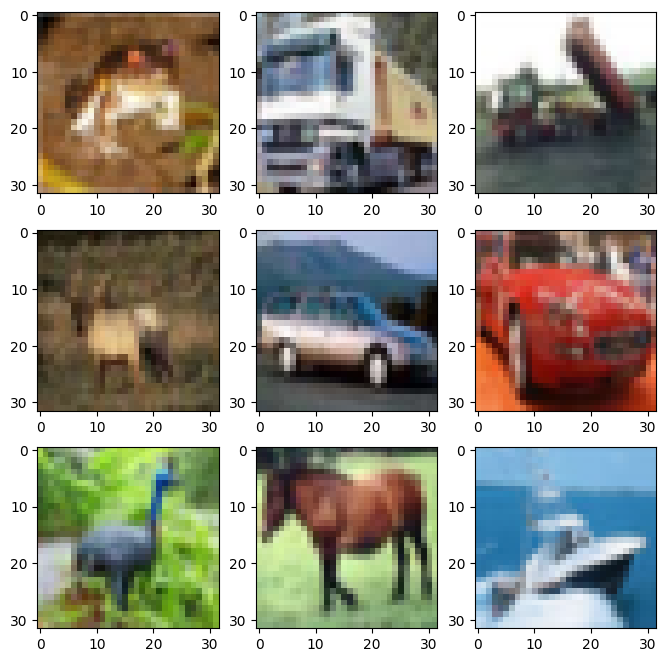

c:\Users\user\Desktop\CIFAR-10-CNN-FLASK-Deployment-main\data.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
c:\Users\user\Desktop\CIFAR-10-CNN-FLASK-Deployment-main\data.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


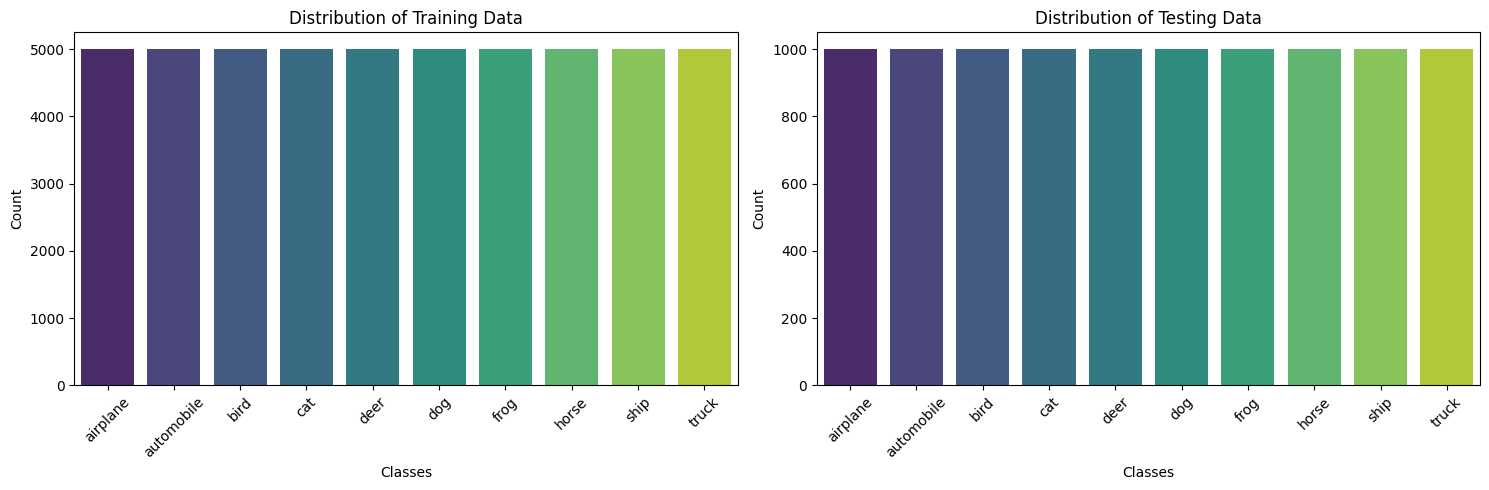

In [3]:
visualization=DataVisualization()
visualization.get_samples(data.x_train)
visualization.classDitribution(data)

## **Preprocess, Data augmentation and Splitting**

In [4]:
data.setValidationData(split_size=0.5,)


Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (5000, 32, 32, 3)
Shape of x_val is (5000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (5000, 1)
Shape of y_val is (5000, 1)


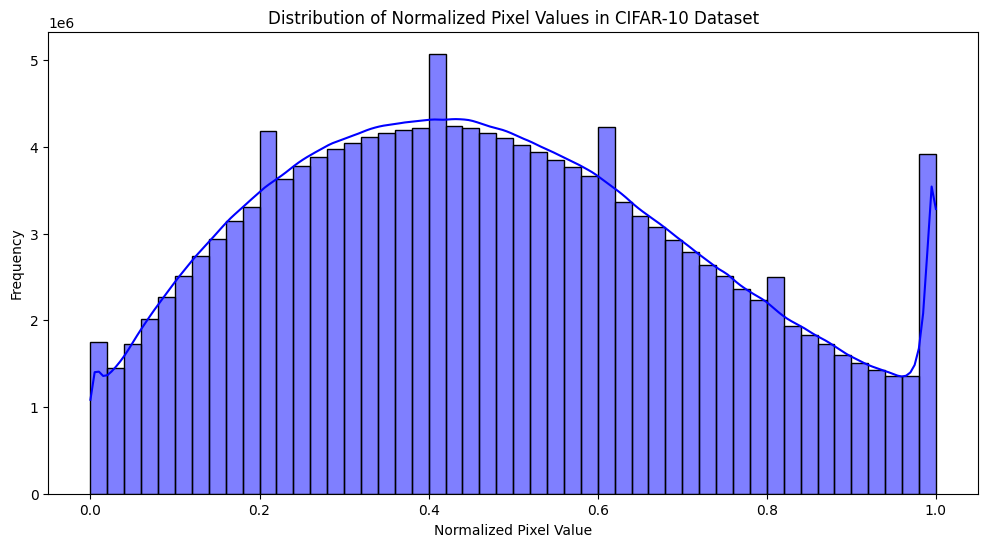

In [5]:

dataPreprocessing= DataPreprocessing()
dataPreprocessing.normalizeX_Data(data)

x_train_flat_normalized = data.x_train.flatten()
x_test_flat_normalized = data.x_test.flatten()
x_val_flat_normalized = data.x_val.flatten()
plt.figure(figsize=(12, 6))
# Plot the distribution of normalized pixel values
sns.histplot(x_train_flat_normalized, bins=50, color='blue', kde=True)
plt.xlabel('Normalized Pixel Value')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Pixel Values in CIFAR-10 Dataset-X_train')
plt.show()





In [18]:
# Flatten images and create DataFrames


# Create DataFrames
import pandas as pd

import tensorflow_data_validation as tfdv


train_df = pd.DataFrame(x_train_flat_normalized)
train_df['label'] = data.y_train

test_df = pd.DataFrame(x_test_flat_normalized)
test_df['label'] = data.y_test

val_df = pd.DataFrame(x_val_flat_normalized)
val_df['label'] = data.y_val

import tensorflow_data_validation as tfdv

# Generate statistics for the training data
train_stats = tfdv.generate_statistics_from_dataframe(train_df)

# Visualize the statistics
tfdv.visualize_statistics(train_stats)

AttributeError: module 'tensorflow' has no attribute 'train'

In [ ]:



y_train = tf.keras.utils.to_categorical(y_train , 10)
y_test = tf.keras.utils.to_categorical(y_test , 10)
y_val  = tf.keras.utils.to_categorical(y_val , 10)

datagen.fit(x_train)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(50000, 32, 32, 3)
(50000, 10)
(5000, 10)
(5000, 10)


## **Graph**

In [23]:
def results(model):
  epoch = 93

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.savefig("Classification Accuracy")
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.savefig("Model loss")
  plt.show()

##**Model**

In [25]:
weight_decay = 1e-4
model = Sequential([
                    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
                    BatchNormalization(),
                    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.2),

                    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),

                    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.4),

                    Flatten(),
                    Dense(256, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(10, activation='softmax')                    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

In [26]:
opt =    tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', 
                                patience=10,
                                cooldown=1,
                                verbose=1),
              EarlyStopping(monitor='val_loss',
                            min_delta=1e-4,
                            patience=15)]

In [28]:
epoch = 200
history = model.fit(datagen.flow(x_train , y_train , batch_size = 64), epochs = epoch, steps_per_epoch=len(x_train)/64, validation_data = (x_val , y_val) , verbose = 1, callbacks=callbacks)

Epoch 1/200


781/781 [==============================] - 543s 668ms/step - loss: 1.7614 - accuracy: 0.4334 - val_loss: 1.4608 - val_accuracy: 0.5426 - lr: 0.0010
Epoch 2/200
781/781 [==============================] - 624s 799ms/step - loss: 1.1920 - accuracy: 0.6069 - val_loss: 1.1125 - val_accuracy: 0.6594 - lr: 0.0010
Epoch 3/200
781/781 [==============================] - 772s 989ms/step - loss: 1.0009 - accuracy: 0.6832 - val_loss: 1.1048 - val_accuracy: 0.6614 - lr: 0.0010
Epoch 4/200
781/781 [==============================] - 512s 654ms/step - loss: 0.9278 - accuracy: 0.7176 - val_loss: 0.9113 - val_accuracy: 0.7392 - lr: 0.0010
Epoch 5/200
781/781 [==============================] - 876s 1s/step - loss: 0.8729 - accuracy: 0.7451 - val_loss: 0.8664 - val_accuracy: 0.7552 - lr: 0.0010
Epoch 6/200
781/781 [==============================] - 989s 1s/step - loss: 0.8458 - accuracy: 0.7655 - val_loss: 0.7747 - val_accuracy: 0.7970 - lr: 0.0010
Epoch 7/200
781/781 [=======================

KeyboardInterrupt: 

## **Results and Save**

In [29]:
acc = model.evaluate(x_test , y_test)
print("test set loss : " , acc[0])
print("test set accuracy :", acc[1]*100)

157/157 [==============================] - 12s 75ms/step - loss: 0.6492 - accuracy: 0.8790
test set loss :  0.649215042591095
test set accuracy : 87.90000081062317


In [30]:
results(model)

NameError: name 'history' is not defined

In [31]:
model.save("CNN-91.74.h5")

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
